#  Creating Scraping script For indeed.com 
- Finds 
1. Job title
2. Location 
3. Salary 
4. Summary 


And Finally Putting everything in Pandas Data_frame

In [77]:
import time
import csv

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

In [3]:
url="https://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York"

 # Requests for the above URL

In [4]:
page=requests.get(url)


### Using Beautifulsoup and html parser

In [5]:
soup=BeautifulSoup(page.text,'html.parser')

In [6]:
print(len(soup.text))

8815


# Function For Job Title

In [27]:

def job_title(soup):
    jobsmeta=[]
    jobs=[]
    content=soup.find_all('td',class_='resultContent')
    for c  in content:
        for p in c.find_all('div',class_='heading4 color-text-primary singleLineTitle tapItem-gutter'):
            p.text.replace('new','')
            jobsmeta.append(p.text)
    for i in range(len(jobsmeta)):
         jobs.append(jobsmeta[i].replace('new',''))     
    return jobs

job_title(soup)


['Data Scientist, Machine Learning (Remote)',
 'Data Scientist',
 'Data Scientist, Spotify For Artists',
 'Data Scientist',
 'Junior Data Scientist',
 'Data Scientist, Game Analytics & Strategy',
 'Data Scientist',
 'Data Scientist - Marketing Science',
 'Data Scientist',
 'Data Scientist - New York',
 'Data Scientist',
 'Junior Data Scientist - BAM Elevate',
 'Data Scientist, Analytics - Trust & Safety',
 'Data Scientist I',
 'Data Scientist']

# Function For Location

In [36]:
def location(soup):
    locations=[]
    for locationT in soup.find_all('div',class_="companyLocation"):
        locationT=locationT.text
        locations.append(locationT)
    for i in range(len(locations)):
        locations[i].replace('location','')
        locations[i].replace('+','')
        
    return locations
location(soup)

['Remote in New York, NY',
 'New York, NY',
 'Remote in New York, NY+15 locations',
 'Manhattan, NY+2 locations',
 'Remote in New York State',
 'New York, NY 10022 (Midtown area)+1 location',
 'Remote in New York, NY',
 'Remote in New York State',
 'New York, NY',
 'New York, NY+1 location',
 'New York, NY',
 'New York, NY',
 'New York, NY 10017 (Midtown area)+2 locations',
 'White Plains, NY 10601',
 'New York, NY 10036 (Midtown area)']

# Function For Salary 

In [62]:
def salary(soup):
    salaries=[]
    for t in soup.find_all('td',class_='resultContent'):
        try:
            for sal in t.find('div',class_="attribute_snippet"):
                sal=sal.text
                if sal=='':
                    pass
                salaries.append(sal.strip())
        except:
            salaries.append('Nothing Found')
    while('' in salaries):
        salaries.remove('')
    while('+1' in salaries):
        salaries.remove('+1')
    
        
    return salaries
salary(soup)

['Full-time',
 '$70,400 - $89,300 a year',
 'Nothing Found',
 '$75,504 - $86,830 a year',
 'Nothing Found',
 'Nothing Found',
 'Part-time',
 'Nothing Found',
 'Nothing Found',
 'Full-time',
 'Full-time',
 'Full-time',
 'Nothing Found',
 'Nothing Found',
 'Full-time']

# Function For Job summary 

In [67]:
def job_summary(soup):
    summaries=[]
    for s in soup.find_all('div',class_='job-snippet'):
        s=s.text.strip()
        summaries.append(s)
    return summaries
job_summary(soup)

['As an ML Data Scientist working on ads, you will be working with other data scientists, product managers, product, engineering, and sales to build an amazing…',
 'Experience in exploring data, hypothesis formulation, data wrangling that enriches understanding, and creating clean data for analysis.',
 'Partner closely with the other data scientists, user researchers, and data engineers to help inform, build and test hypotheses to deliver actionable insights…',
 'Which include but are not limited to a mastery in conducting data landscape analyses, identifying and documenting data sources, joining and integrating datasets…',
 'Strong quantitative background (having either been a graduate of a data science bootcamp, or the holder of an undergraduate or graduate degree in data science,…',
 'Perform exploratory analysis of new data sources to assess data quality and applicability in decision-making.\nHelp design procedures to maintain data integrity.',
 'Stay current on modern trends and a

# Putting Everything together in pandas data_frame

In [76]:
salary_df_titles={
    'City':'New+York',
    'Job_Title':job_title(soup),
    'Company_name':company_name(soup),
    'Locations':location(soup),
    'Summary':job_summary(soup),
    'Salary' :salary(soup)
}
df=pd.DataFrame(salary_df_titles)

df.head()




,City,Job_Title,Company_name,Locations,Summary,Salary
0,New+York,"Data Scientist, Machine Learning (Remote)",Quizlet,"Remote in New York, NY","As an ML Data Scientist working on ads, you wi...",Full-time
1,New+York,Data Scientist,Anheuser-Busch,"New York, NY","Experience in exploring data, hypothesis formu...","$70,400 - $89,300 a year"
2,New+York,"Data Scientist, Spotify For Artists",Spotify,"Remote in New York, NY+15 locations",Partner closely with the other data scientists...,Nothing Found
3,New+York,Data Scientist,NYC Careers,"Manhattan, NY+2 locations",Which include but are not limited to a mastery...,"$75,504 - $86,830 a year"
4,New+York,Junior Data Scientist,SmartAsset,Remote in New York State,Strong quantitative background (having either ...,Nothing Found


# Making CSV_FILE

In [78]:
df.to_csv('indeed.csv')

Then Import It to LibreOffice 


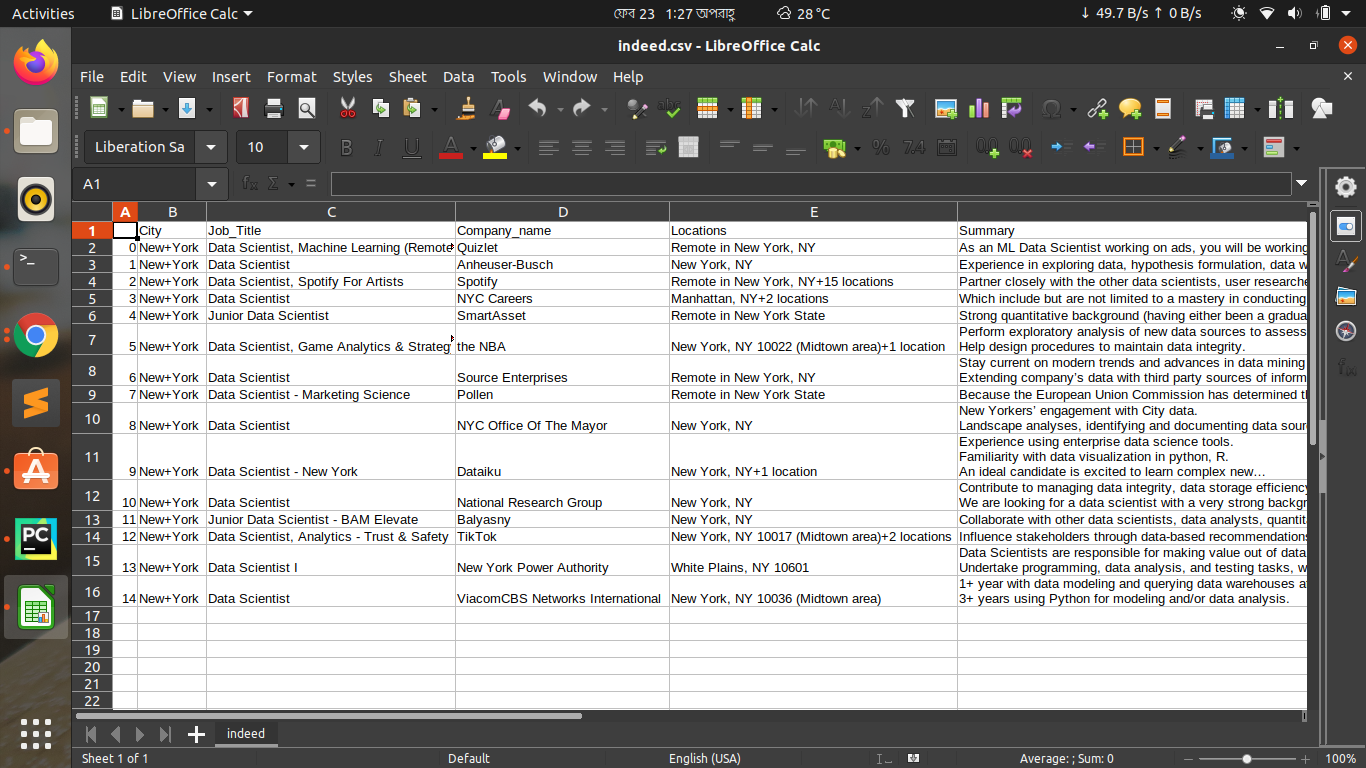

In [81]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "/home/keai33/Pictures/Screenshot from 2022-02-23 13-27-46.png")